# 1. Importing Necessary Libraries

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# Loading and visualizing the Dataset
df = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\data\\raw data\\video_games_sales.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# shape of the df
df.shape

(16719, 16)

In [4]:
# general information of the dataframe including memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
# column names
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

## 2. Data Cleaninig

##### 2.1 Removing Duplicated Records (If Any)

In [6]:
# first let's check the existance of duplicated records in the data set
df.duplicated().sum()

0

The result shows there are no duplicated records in the dataframe.

##### 2.2 Data Type Conversion

In [7]:
# let's see if there are any wrongly placed features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [8]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


1. User_Score is object , but it have to be a float

In [9]:
# convert User_Score to float
# first let's assign "tbd" as nan
df["User_Score"] = np.where(df["User_Score"] == "tbd", np.nan, df["User_Score"])

In [10]:
len(df[df["User_Score"] == "tbd"])

0

In [11]:
# now let's convert the User_Score feature to float
df["User_Score"] = df["User_Score"].astype("float")

##### 2.2 Standardizing Values in Categorical Columns

In [12]:
# first let's see the number the values in the categorical columns
df.select_dtypes("object").nunique()

Name         11562
Platform        31
Genre           12
Publisher      581
Developer     1696
Rating           8
dtype: int64

In [13]:
# let's see a unique values in genre and rating columns
for col in ["Genre", "Rating"]:
    print(col, df[col].unique())
    print()

Genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Rating ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']



There is no value to be standardized in the categorical columns.

##### 2.4 Dropping Leaky Columns

In [14]:
# Our target Column is  Global Sales, so any column related to sales is a leaky column
leaky_columns =[var for var in df.columns if var.__contains__("Sale") and var != "Global_Sales"]
leaky_columns

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [15]:
# we have to drop this leaky columns from the dataset
df.drop(leaky_columns, axis = 1, inplace=True)

##### 2.5 Dropping High Cardinality Features

In [16]:
# let's drop the high cardinality features like Name
df.drop(["Name", "Developer", "Publisher"], axis = 1, inplace = True)

In [17]:
df.head()

,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,82.53,76.0,51.0,8.0,322.0,E
1,NES,1985.0,Platform,40.24,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,32.77,80.0,73.0,8.0,192.0,E
4,GB,1996.0,Role-Playing,31.37,NaN,NaN,NaN,NaN,NaN


# 3. Data Analysis

## 3.1 Categorical Features

In [18]:
# let's mask out the categorical columns
cat_vars = [var for var in df.columns if df[var].dtypes == "object"]
cat_vars

['Platform', 'Genre', 'Rating']

In [19]:
# number of categorical columns
len(cat_vars)

3

In [20]:
# let's visualize the categorical features dataframe
df[cat_vars].head()

,Platform,Genre,Rating
0,Wii,Sports,E
1,NES,Platform,NaN
2,Wii,Racing,E
3,Wii,Sports,E
4,GB,Role-Playing,NaN


### 3.1.1 Cardinality of Categorical Features

In [21]:
# let's check the cardinality of the categorical features
df[cat_vars].nunique()

Platform    31
Genre       12
Rating       8
dtype: int64

Since we have removed HIGH CARDINALITY FEATURES IN THE DATA CLEANING STEP, we are here only with LOW CARDINALITY features.

### 3.1.2 Categorical Missing Values

In [22]:
# let's capture all categorical variables with missing values
cat_vars_miss = [var for var in cat_vars if df[var].isnull().sum() > 0]
cat_vars_miss

['Genre', 'Rating']

In [23]:
# number of categorical variables with missing values.
len(cat_vars_miss)

2

In [24]:
# we have 2 categorical variables with missing values, let's see the percentage of missing value in each feature.
df[cat_vars_miss].isnull().mean().sort_values(ascending=False)

Rating    0.404869
Genre     0.000120
dtype: float64

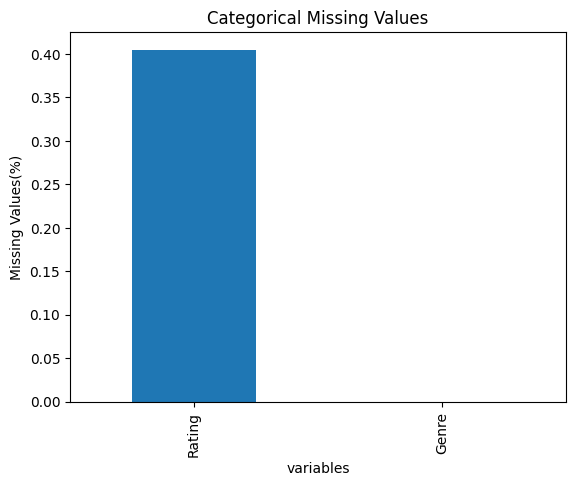

In [25]:
# let's plot a bar chart of missing values in the categorical colums
df[cat_vars_miss].isnull().mean().sort_values(ascending=False).plot.bar()
plt.title("Categorical Missing Values")
plt.ylabel("Missing Values(%)")
plt.xlabel("variables")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\reports\\Figures\\Categorical Missing Values.jpg")
plt.show()

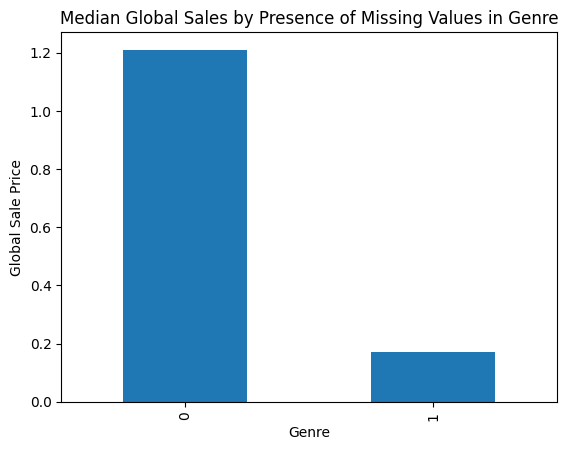

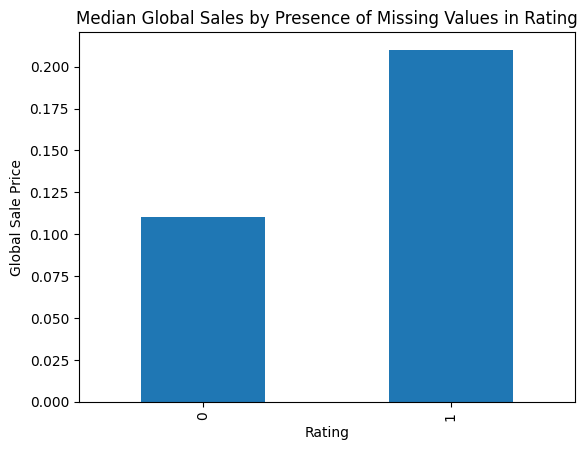

In [26]:
# Let's see the contribution of the missing values in the target column Global_Sale
# first let's define a function to flag missing values
def analyse_missing_cat(data, var):
    # first copy the dataframe
    data = data.copy()
    # flag missing values
    data[var] = np.where(data[var].isnull(),0,1)
    # let's plot the bar chart
    data.groupby(var)["Global_Sales"].median().plot.bar()
    plt.ylabel("Global Sale Price")
    plt.title(f"Median Global Sales by Presence of Missing Values in {var}")
    plt.savefig(f"C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\reports\\Figures\\analyse_missing_cat\\missing value_{var}.jpg")
    plt.show()

# now let's define a function to 
for var in cat_vars_miss:
    analyse_missing_cat(df,var)

As we can see from the above plot
1.For variables 
* Rating ...... Non Missing Values have higher median Global_Sales Price
2. For variables
* Genre, ...... Missing Values have higher median Global_Sales Price

### 3.1.3 Rare Labels

In [27]:
# Now let's see rare labels(which are <!%) in the categorical features
def analyse_rare(data, var):
    #copy the dataframe
    data = data.copy()
    # let's create a temporary series
    temp = data.groupby(var)[var].count()/len(df)
    temp = temp[temp < 0.01]
    return temp

# let's see variables which exist in each feature in less than 1%.
for var in cat_vars:
    print(var)
    print(analyse_rare(df, var))
    print(f"rare_labels", len(analyse_rare(df,var)))
    print()
    

Platform
Platform
2600    0.007955
3DO     0.000179
DC      0.003110
GB      0.005862
GEN     0.001735
GG      0.000060
NES     0.005862
NG      0.000718
PCFX    0.000060
SCD     0.000359
TG16    0.000120
WS      0.000359
WiiU    0.008792
Name: Platform, dtype: float64
rare_labels 13

Genre
Series([], Name: Genre, dtype: float64)
rare_labels 0

Rating
Rating
AO     0.000060
EC     0.000478
K-A    0.000179
RP     0.000179
Name: Rating, dtype: float64
rare_labels 4



As we can see from the above result 
1. Platform feature  have high amount of rare label. (13)
2. Rating feature have moderate amount of rare label. (4)
3. Genere  feature have no rare label.(0)

### 3.1.4 Categorical Values vs Global Sale Price

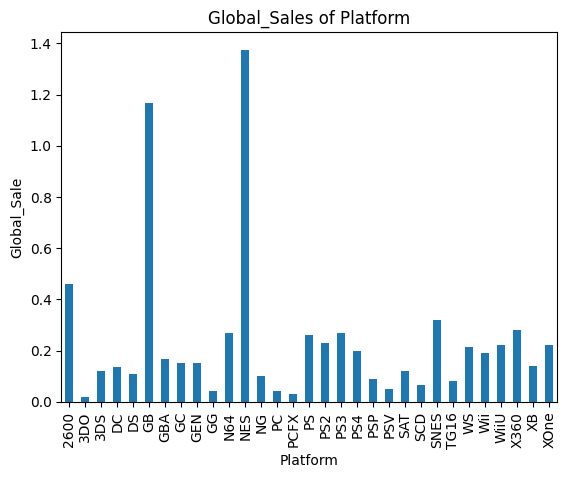

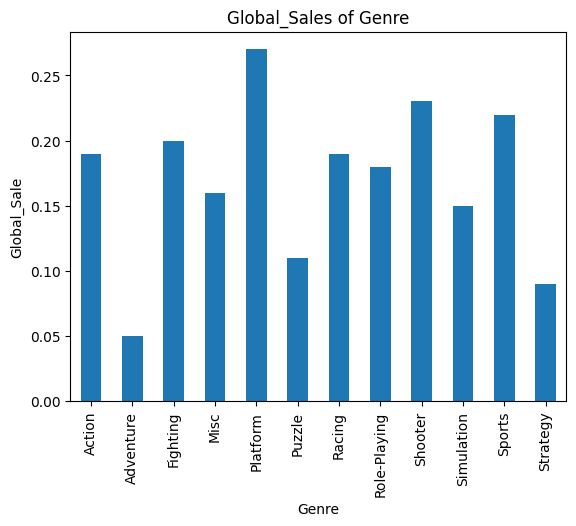

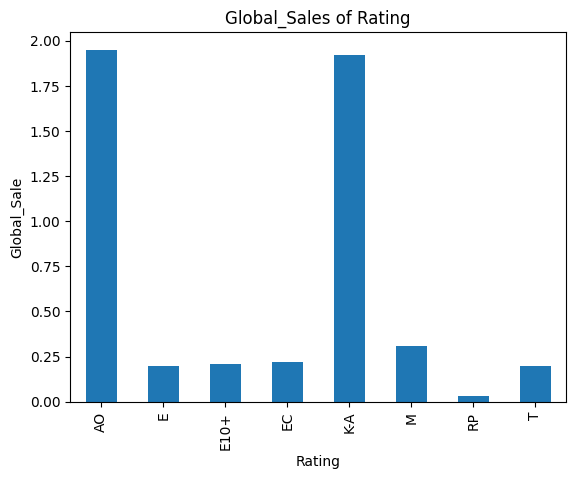

In [28]:
# first let's define a function
def analyse_categories(data, var):
    # first copy the dataframe
    data = data.copy()
    
    # let's group the dataframe based on the variable
    data.groupby(var)["Global_Sales"].median().plot.bar()
    plt.title(f"Global_Sales of {var}")
    plt.xlabel(var)
    plt.ylabel("Global_Sale")
    plt.savefig(f"C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\reports\\Figures\\cat values vs target column\\{var}_Global_Sale.jpg")
    plt.show()
    
# let's apply the analyse function
for var in cat_vars:
    analyse_categories(df, var)

As we can see different values of different categorical features have different median Global_sale price.

## 3.2 Numerical Features

In [29]:
# first let's mask out the numerical features
num_vars = [var for var in df.select_dtypes("number")]
num_vars

['Year_of_Release',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count']

In [30]:
# number of numerical features
len(num_vars)

6

In [31]:
# let's visualize the numeirical features dataframe
df[num_vars].head()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,82.53,76.0,51.0,8.0,322.0
1,1985.0,40.24,NaN,NaN,NaN,NaN
2,2008.0,35.52,82.0,73.0,8.3,709.0
3,2009.0,32.77,80.0,73.0,8.0,192.0
4,1996.0,31.37,NaN,NaN,NaN,NaN


### 3.2.1 Temporal Variables

In [32]:
# temporal variables are those which indicate time frames
# first let's mask out the temporal variable
temp_vars = [var for var in num_vars if var.__contains__("Year")]
temp_vars

['Year_of_Release']

The DataFrame have only 1 temporal feature

In [33]:
# let's see the unique values in this temporal feature
for var in temp_vars:
    print(df[var].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]


In [34]:
# number of unique values in the temporal varaibles 
for var in temp_vars:
    print((df[var].nunique()))

39


The Data Frame Have 39 unique Features.

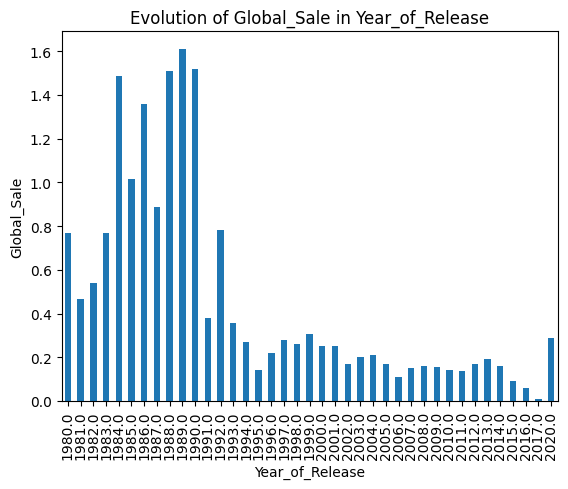

In [35]:
# evolution of median Global sale price for each temporal variable
def analyse_temp(data, var):
    # copy the dataframe
    data = data.copy()
    
    data.groupby(var)["Global_Sales"].median().plot.bar()
    plt.title(f"Evolution of Global_Sale in {var}")
    plt.ylabel("Global_Sale")
    plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\reports\\Figures\\"f"Evolution of Global_Sale in {var}.jpg")
    plt.show()

# let's apply the analyse temp function
for var in temp_vars:
    analyse_temp(df,var)

As shown the median vale of Global Sale decreases as  the time progresses. which is difficult to trust let's visualize it using scatter plot.

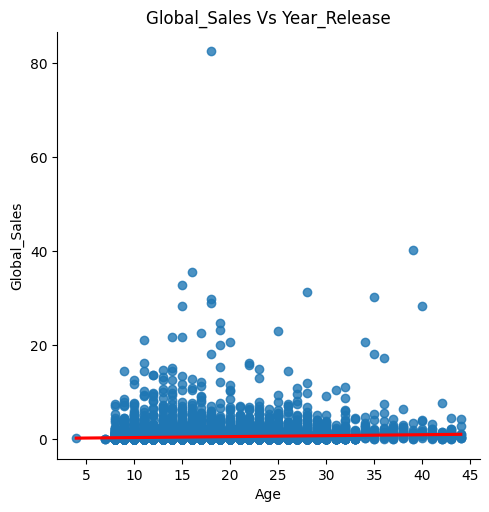

In [36]:
# scatter plot of Global Sale Price vs time
def analyse_temp_scatter(data, var):
    # first copy the dataframe
    data = data.copy()
    
    today = datetime.today()
    year = today.year
    year
    # let's Extract the Age of the Video Game
    data["Age"] = year - data[var]
    
    sns.lmplot(data = data,x = "Age", y ="Global_Sales", line_kws={"color": "red"})
    plt.title("Global_Sales Vs Year_Release")
    plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\reports\\Figures\\Global_Sales Vs Year_Release.jpg")
    plt.show()

for var in temp_vars:
    analyse_temp_scatter(df, var)

This Scatter Plot shows there is somehow constant value of Global_Sales as the Age Increases.

#### 3.2.2.1 Missing Values 

In [37]:
# let's analyse the missing values in temporal varaibles
temp_vars_miss = [var for var in temp_vars if df[var].isnull().sum() > 0]
temp_vars_miss

['Year_of_Release']

In [38]:
# The Year_of_Release Feature have a missing values. let's analyse it.
# first let's see the percentage of missing value
df[temp_vars_miss].isnull().mean()

Year_of_Release    0.016089
dtype: float64

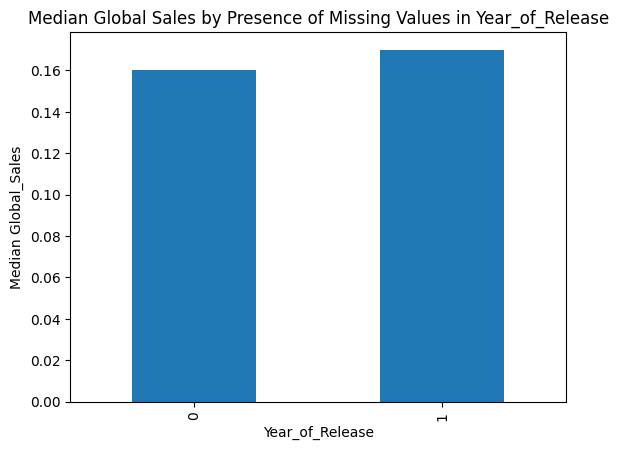

In [39]:
# almost 1.6% of the data is missing 
# let's plot the
def analyse_temp_miss(data, var):
    # first let's copy the data
    data = data.copy()
    
    df[var] = np.where(df[var].isnull(), 0, 1)
    
    df.groupby(var)["Global_Sales"].median().plot.bar()
    plt.ylabel("Median Global_Sales")
    plt.title(f"Median Global Sales by Presence of Missing Values in {var}")
    plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\reports\\Figures\\Temp_Median_Global_Sales_by_Precence of Missing Values.jpg")

    plt.show()
    
# let's apply the analyse temp miss function
for var in temp_vars_miss:
    analyse_temp_miss(df, var)

The missing and Non missing records in the Year Feature almost have an Equal Median Global Selling Price.

### 3.2.2 Discrete Variables

In [40]:
# first let's mask discrete varaibles(numerical variables with less than 20 unique values)
disc_vars = [var for var in num_vars if  df[var].nunique() <20 and var not in temp_vars ]
disc_vars

[]

As shown from the above result the data frame does not have and discrete numerical variables.

### 3.2.3 Continuous Numerical Variables

In [41]:
# first let's mask out continous numerical variables
cont_vars = [var for var in num_vars if var not in disc_vars and var not in temp_vars]
cont_vars

['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

In [42]:
# number of continous numerical variables
len(cont_vars)

5

In [43]:
# let's visualize the continous numerical variables dataframe
df[cont_vars].head()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,82.53,76.0,51.0,8.0,322.0
1,40.24,NaN,NaN,NaN,NaN
2,35.52,82.0,73.0,8.3,709.0
3,32.77,80.0,73.0,8.0,192.0
4,31.37,NaN,NaN,NaN,NaN


In [44]:
df[cont_vars].describe()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,0.533543,68.967679,26.360821,7.125046,162.229908
std,1.547935,13.938165,18.980495,1.500006,561.282326
min,0.010000,13.000000,3.000000,0.000000,4.000000
25%,0.060000,60.000000,12.000000,6.400000,10.000000
50%,0.170000,71.000000,21.000000,7.500000,24.000000
75%,0.470000,79.000000,36.000000,8.200000,81.000000
max,82.530000,98.000000,113.000000,9.700000,10665.000000


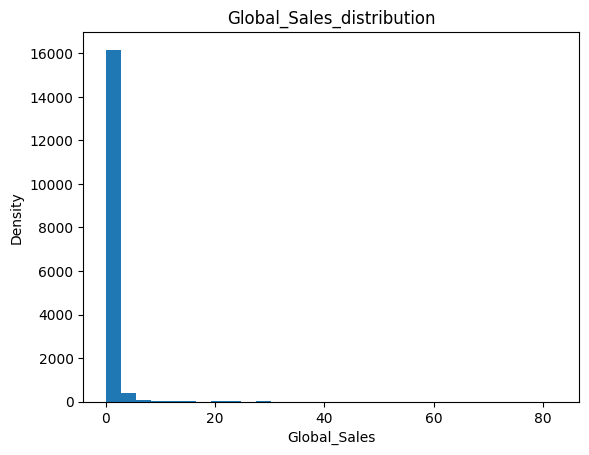

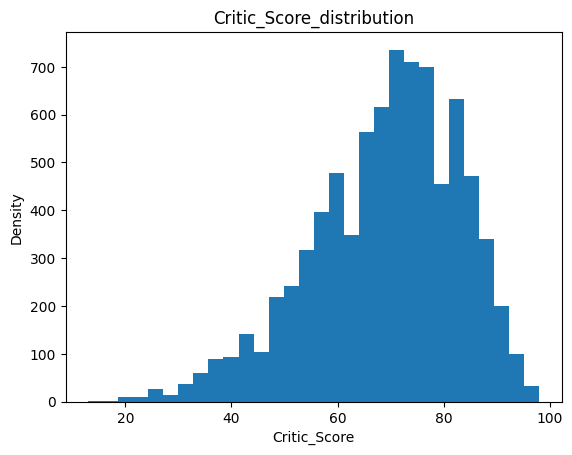

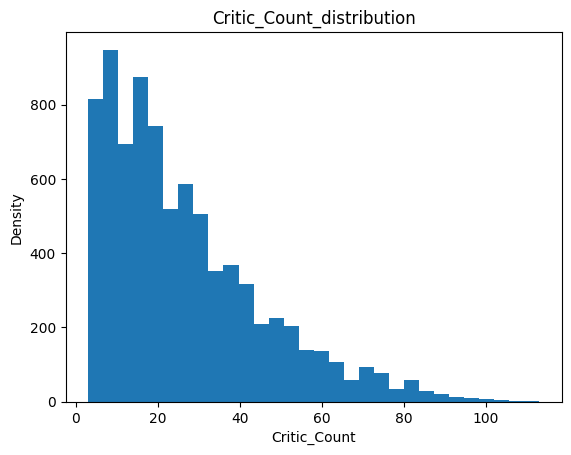

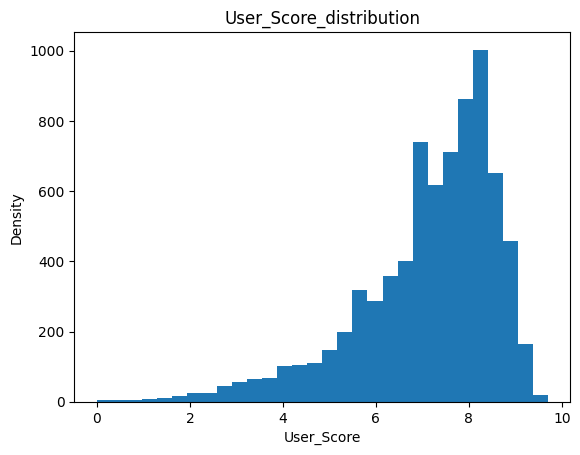

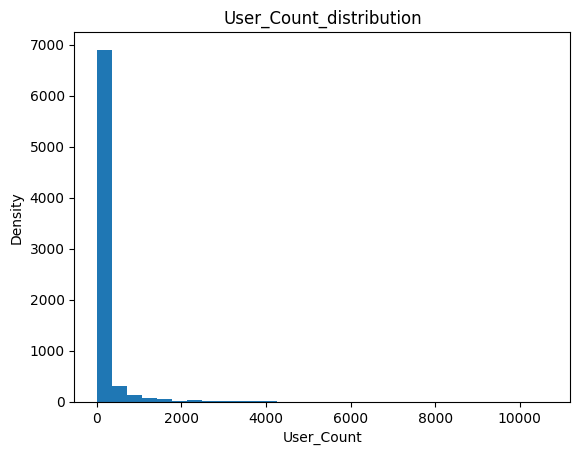

In [45]:
# let's plot the distribution of continous variables
def analyse_cont(data, vara):
    # first copy the dataframe
    data = data.copy()
    plt.hist(df[var],bins = 30)
    plt.title(f"{var}_distribution")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.savefig(f"C:\\Users\\yozil\\Desktop\\My projects\\11. Video_Game_Sales_Prediction\\reports\\Figures\\distribution of continous variables\\distribution of {var}.jpg")
    plt.show()
    
# let's apply the analyse_count function
for var in cont_vars:
    analyse_cont(df,var)

As we can see from the above distribution the variables are not normally distributed so we will consider transformations to make them resemble normal distributions.

In [49]:
import pylab
import scipy.stats as stats

In [66]:
# let's apply different transformations in the data and see if they manage to give better result using QQ plots.
def analyze_transform(data, var):
   
    plt.figure(figsize=(23,4))
    # first let's apply a logarithmic transformation
    plt.subplot(1,6,1)
    plt.hist(data[var])
    plt.title(f"{var}_Original Distribution")
    
    # Let's plot the original distribution QQ plot
    plt.subplot(1,6,2)
    stats.probplot(data[var], dist= "norm", plot = pylab)
    plt.title("Original QQ")
    
    
    # let's plot the log transfor qq plot
    plt.subplot(1,6,3)
    stats.probplot(np.log(data[var]+1),dist = "norm", plot=pylab)
    plt.title("LT")
    
    # Now let's plot the reciprocal transformation
    plt.subplot(1,6,4)
    stats.probplot(1/data[var], dist = "norm", plot = pylab)
    plt.title("RT")
    
    # Now let's plot the Yeo Johnson QQ plot
    plt.subplot(1,6,5)
    stats.probplot(stats.yeojohnson(data[var], lmbda = 0.001), dist = "norm", plot = pylab)
    plt.title("YJT")
    
    # Now let's plot the square roor QQ plot
    plt.subplot(1,6,6)
    stats.probplot((data[var])**(0.5), dist = "norm", plot = pylab)
    plt.title("SQT")
    
    plt.show()
    
# now let's apply the analyze transform function
for var in num_vars:
    analyze_transform(df,var)


IndentationError: unexpected indent (3439978084.py, line 2)